In [3]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Wine.csv")

Saving Wine.csv to Wine.csv


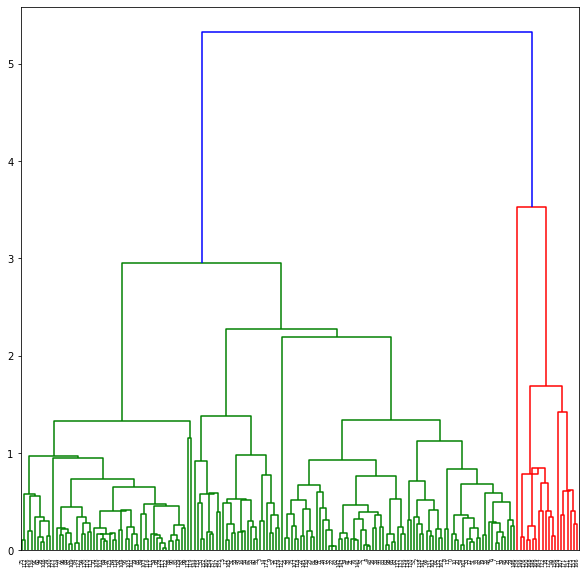

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
df1=df["Alcohol"]
df2=df["Color_Intensity"]
dfx=pd.concat([df1,df2],axis=1)
Z=linkage(dfx,method='centroid',metric='euclidean')
fig=plt.figure(figsize=(10, 10))
'''На отметке в 6 кластеров (расстояние ~2) увеличение расстояния, требуемое на то, чтобы объединить кластеры, сильно возрастает.
Следовательно, это может означать тот факт, что данные 6 кластеров достаточно рассредоточены, чтобы в полной мере с помощью них
отобразить разницу между категориями вин'''
dn=dendrogram(Z)

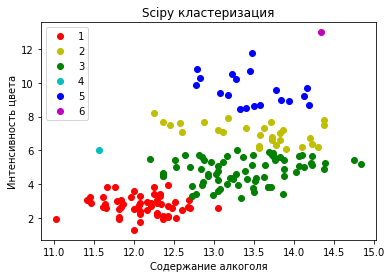

In [42]:
df["Cluster"]=fcluster(Z,2,criterion='distance')
plt.plot(df[df['Cluster']==1]['Alcohol'],df[df['Cluster']==1]['Color_Intensity'],'ro',label='1')
plt.plot(df[df['Cluster']==2]['Alcohol'],df[df['Cluster']==2]['Color_Intensity'],'yo',label='2')
plt.plot(df[df['Cluster']==3]['Alcohol'],df[df['Cluster']==3]['Color_Intensity'],'go',label='3')
plt.plot(df[df['Cluster']==4]['Alcohol'],df[df['Cluster']==4]['Color_Intensity'],'co',label='4')
plt.plot(df[df['Cluster']==5]['Alcohol'],df[df['Cluster']==5]['Color_Intensity'],'bo',label='5')
plt.plot(df[df['Cluster']==6]['Alcohol'],df[df['Cluster']==6]['Color_Intensity'],'mo',label='6')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Интенсивность цвета')
plt.title('Scipy кластеризация')
plt.legend(loc=2)
plt.show()

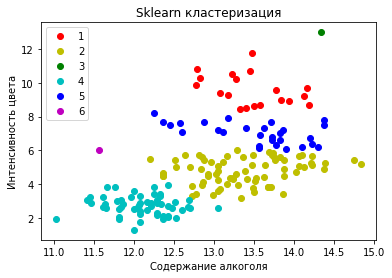

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='average')
df["Cluster1"]=hc.fit_predict(dfx)
plt.plot(df[df['Cluster1']==0]['Alcohol'],df[df['Cluster1']==0]['Color_Intensity'],'ro',label='1')
plt.plot(df[df['Cluster1']==1]['Alcohol'],df[df['Cluster1']==1]['Color_Intensity'],'yo',label='2')
plt.plot(df[df['Cluster1']==2]['Alcohol'],df[df['Cluster1']==2]['Color_Intensity'],'go',label='3')
plt.plot(df[df['Cluster1']==3]['Alcohol'],df[df['Cluster1']==3]['Color_Intensity'],'co',label='4')
plt.plot(df[df['Cluster1']==4]['Alcohol'],df[df['Cluster1']==4]['Color_Intensity'],'bo',label='5')
plt.plot(df[df['Cluster1']==5]['Alcohol'],df[df['Cluster1']==5]['Color_Intensity'],'mo',label='6')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Интенсивность цвета')
plt.title('Sklearn кластеризация')
plt.legend(loc=2)
plt.show()